In [3]:
import pandas as pd


meta_df = pd.read_csv("/content/TraversyMedia_dataset.csv")
transcript_df = pd.read_csv("/content/TraversyMedia_transcripts.csv")

print("📊 Metadata Dataset")
print(meta_df.info())
print(meta_df.describe(include='all'))
print("\nMissing values per column:")
print(meta_df.isnull().sum())
print("\nDuplicates:", meta_df.duplicated().sum())

print("\n📊 Transcript Dataset")
print(transcript_df.info())
print(transcript_df.describe(include='all'))
print("\nMissing values per column:")
print(transcript_df.isnull().sum())
print("\nDuplicates:", transcript_df.duplicated().sum())


📊 Metadata Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       261 non-null    object
 1   title                    261 non-null    object
 2   description              260 non-null    object
 3   publishedAt              261 non-null    object
 4   tags                     261 non-null    object
 5   categoryId               261 non-null    int64 
 6   defaultLanguage          261 non-null    object
 7   defaultAudioLanguage     261 non-null    object
 8   thumbnail_default        261 non-null    object
 9   thumbnail_high           261 non-null    object
 10  duration                 261 non-null    object
 11  viewCount                261 non-null    int64 
 12  likeCount                261 non-null    int64 
 13  commentCount             261 non-null    int64 
 14  privacyStatus          

In [4]:
import pandas as pd


meta_df = pd.read_csv("/content/TraversyMedia_dataset.csv")
transcript_df = pd.read_csv("/content/TraversyMedia_transcripts.csv")

print("Before Cleaning:")
print("Metadata shape:", meta_df.shape)
print("Transcript shape:", transcript_df.shape)


meta_df['publishedAt'] = pd.to_datetime(meta_df['publishedAt'], errors='coerce')

meta_df = meta_df.drop_duplicates(subset=["title"], keep="first")


meta_df['description'] = meta_df['description'].fillna("")

print("\nAfter Metadata Cleaning:")
print("Shape:", meta_df.shape)
print("Missing values per column:\n", meta_df.isnull().sum())


#  Clean Transcript Dataset

if "transcript" in transcript_df.columns:
    transcript_df = transcript_df[["video_id", "transcript"]]
else:
    transcript_df = transcript_df.rename(columns={"id": "video_id"})[["video_id", "transcript"]]


transcript_df = transcript_df.dropna(subset=["transcript"])


transcript_df = transcript_df.drop_duplicates(subset=["video_id"], keep="first")

print("\nAfter Transcript Cleaning:")
print("Shape:", transcript_df.shape)
print("Missing values per column:\n", transcript_df.isnull().sum())


meta_df.to_csv("TraversyMedia_dataset_cleaned.csv", index=False, encoding="utf-8")
transcript_df.to_csv("TraversyMediaTranscripts_cleaned.csv", index=False, encoding="utf-8")

print("\n💾 Cleaned datasets saved as:")
print("TraversyMedia_dataset_cleaned.csv")
print("TraversyMediaTranscripts_cleaned.csv")

Before Cleaning:
Metadata shape: (261, 22)
Transcript shape: (30387, 4)

After Metadata Cleaning:
Shape: (260, 22)
Missing values per column:
 id                         0
title                      0
description                0
publishedAt                0
tags                       0
categoryId                 0
defaultLanguage            0
defaultAudioLanguage       0
thumbnail_default          0
thumbnail_high             0
duration                   0
viewCount                  0
likeCount                  0
commentCount               0
privacyStatus              0
channel_id                 0
channel_title              0
channel_description        0
channel_country            0
channel_thumbnail          0
channel_subscriberCount    0
channel_videoCount         0
dtype: int64

After Transcript Cleaning:
Shape: (664, 2)
Missing values per column:
 video_id      0
transcript    0
dtype: int64

💾 Cleaned datasets saved as:
TraversyMedia_dataset_cleaned.csv
TraversyMediaTranscripts_

In [ ]:
!pip install youtube-transcript-api==0.6.2

Metadata shape: (260, 22)
Transcript shape: (664, 2)

Merged dataset shape: (260, 24)

 Metadata Summary:
          viewCount      likeCount  commentCount
count  2.600000e+02     260.000000    260.000000
mean   2.476219e+05    5627.650000    309.384615
std    5.528622e+05   12250.929345    518.908007
min    2.000000e+03       5.000000      0.000000
25%    5.929800e+04    1292.250000    102.000000
50%    1.224755e+05    2851.000000    195.000000
75%    2.430455e+05    6040.000000    350.250000
max    7.222906e+06  167856.000000   6459.000000

Transcript length stats:
count     260.000000
mean      888.796154
std      1935.017271
min         0.000000
25%       155.000000
50%       155.000000
75%       155.000000
max      6737.000000
Name: transcript_length, dtype: float64

 Top 5 videos by views:
                                                 title  viewCount
188           HTML Crash Course For Absolute Beginners    7222906
45                               React JS Crash Course    3550

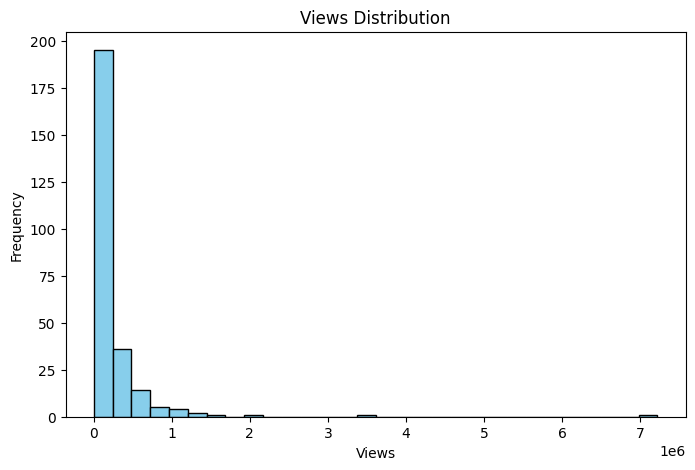

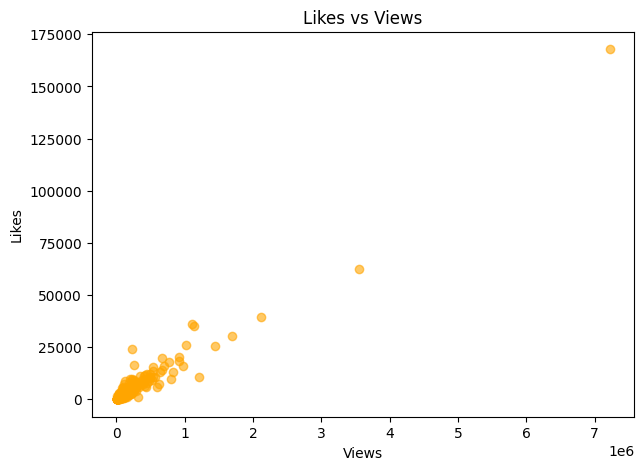

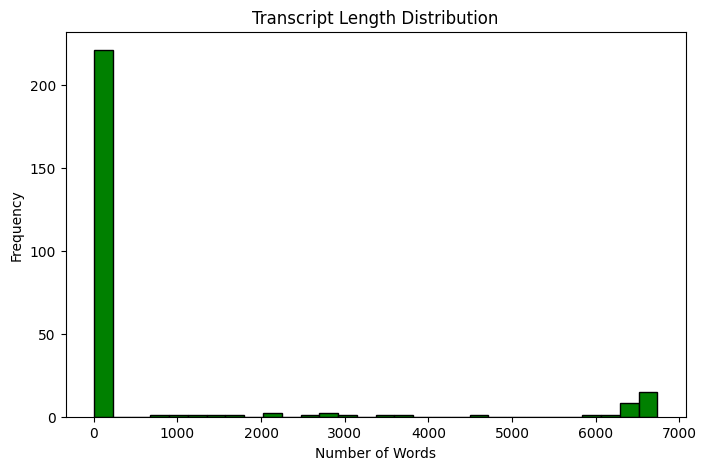

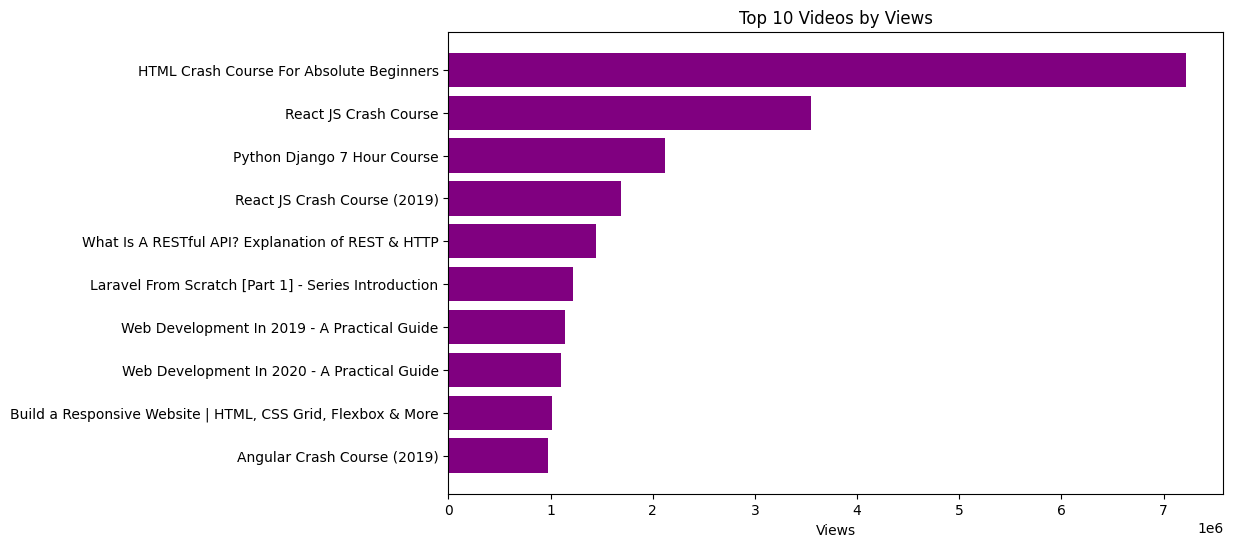

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

meta_df = pd.read_csv("/content/TraversyMedia_dataset_cleaned.csv")
transcript_df = pd.read_csv("/content/TraversyMediaTranscripts_cleaned.csv")

print("Metadata shape:", meta_df.shape)
print("Transcript shape:", transcript_df.shape)

merged_df = pd.merge(meta_df, transcript_df, left_on="id", right_on="video_id", how="left")
print("\nMerged dataset shape:", merged_df.shape)

print("\n Metadata Summary:")
print(meta_df[["viewCount", "likeCount", "commentCount"]].describe())

merged_df["transcript_length"] = merged_df["transcript"].fillna("").apply(lambda x: len(str(x).split()))

print("\nTranscript length stats:")
print(merged_df["transcript_length"].describe())

print("\n Top 5 videos by views:")
print(meta_df[["title", "viewCount"]].sort_values(by="viewCount", ascending=False).head())

print("\n Top 5 videos by likes:")
print(meta_df[["title", "likeCount"]].sort_values(by="likeCount", ascending=False).head())

corr = meta_df[["viewCount", "likeCount", "commentCount"]].corr()
print("\nCorrelation Matrix:\n", corr)

# Visualizations

plt.figure(figsize=(8,5))
plt.hist(meta_df["viewCount"], bins=30, color="skyblue", edgecolor="black")
plt.title("Views Distribution")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

# Likes vs Views scatter
plt.figure(figsize=(7,5))
plt.scatter(meta_df["viewCount"], meta_df["likeCount"], alpha=0.6, color="orange")
plt.title("Likes vs Views")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

# Transcript length distribution
plt.figure(figsize=(8,5))
plt.hist(merged_df["transcript_length"], bins=30, color="green", edgecolor="black")
plt.title("Transcript Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Top 10 most viewed videos
top10 = meta_df.sort_values(by="viewCount", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["title"], top10["viewCount"], color="purple")
plt.title("Top 10 Videos by Views")
plt.xlabel("Views")
plt.gca().invert_yaxis()
plt.show()
